In [4]:
import pandas as pd
from path import Path
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [5]:
filepath =  Path('./Resources/crypto_data.csv')

In [6]:
df = pd.read_csv(filepath, index_col=0)
df.head(20)

,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
365,365Coin,X11,True,PoW/PoS,NaN,2300000000
404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
611,SixEleven,SHA-256,True,PoW,NaN,611000
808,808,SHA-256,True,PoW/PoS,0.000000e+00,0
1337,EliteCoin,X13,True,PoW/PoS,2.927942e+10,314159265359
2015,2015 coin,X11,True,PoW/PoS,NaN,0
BTC,Bitcoin,SHA-256,True,PoW,1.792718e+07,21000000
ETH,Ethereum,Ethash,True,PoW,1.076842e+08,0
LTC,Litecoin,Scrypt,True,PoW,6.303924e+07,84000000


In [7]:
# List the algorithms that are being used 
algorithms = set(df.Algorithm.values)
print(algorithms)

{'X15', 'POS 2.0', 'CryptoNight-V7', 'Avesta hash', 'CryptoNight-lite', 'XEVAN', 'Rainforest', 'Leased POS', 'Scrypt-n', 'Proof-of-Authority', 'TRC10', 'Dagger', 'SkunkHash v2 Raptor', 'PHI2', 'VeChainThor Authority', '1GB AES Pattern Search', 'Shabal256', 'ScryptOG', 'Keccak', 'Lyra2Z', 'SHA3', 'Skein', 'Blake2S', 'VBFT', 'Scrypt', '536', 'PHI1612', 'Dagger-Hashimoto', 'XG Hash', 'Blake', 'CryptoNight Heavy', 'T-Inside', 'CryptoNight-Lite', 'Equihash', 'QuarkTX', 'X16S', 'SHA3-256', 'NeoScrypt', 'Lyra2RE', 'SHA-256 + Hive', 'SHA-512', 'Ethash', 'Green Protocol', 'Groestl', 'SHA-256D', 'DPoS', 'Lyra2REv2', 'QuBit', 'Wild Keccak', 'SkunkHash', 'Multiple', 'Tribus', 'Semux BFT consensus', 'SHA-256', 'Blake2b', 'CryptoNight', 'Quark', 'POS 3.0', 'YescryptR16', 'Equihash1927', 'BLAKE256', 'Time Travel', 'Jump Consistent Hash', 'X13', 'Argon2', 'ECC 256K1', 'Stanford Folding', 'Equihash+Scrypt', 'X16R', 'M7 POW', 'Momentum', 'vDPOS', 'PoS', 'IMesh', 'M00N', 'X11', 'Zhash', 'Slatechain', 'Cl

In [8]:
df['IsTrading'].value_counts()

True     1144
False     108
Name: IsTrading, dtype: int64

In [9]:
# Selecting the cryptocurrencies that are being traded only
df = df.loc[df['IsTrading'] == True]
df['IsTrading'].value_counts()

True    1144
Name: IsTrading, dtype: int64

In [10]:
# Tutor - delete the istrending column because it's not necessary anymore 
df = df.drop('IsTrading', axis=1)
df.head()

,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
365,365Coin,X11,PoW/PoS,NaN,2300000000
404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
611,SixEleven,SHA-256,PoW,NaN,611000
808,808,SHA-256,PoW/PoS,0.000000e+00,0


In [11]:
# Look for the null values and remove from the data 
df = df.dropna(axis=0, how='any')
df.shape

(685, 5)

In [12]:
# Sort the values in TotalCoinsMined to find the negative and the zero values
df.TotalCoinsMined.sort_values()

FIII   -5.917978e+09
LBTC    0.000000e+00
RIPO    0.000000e+00
BASH    0.000000e+00
CSH     0.000000e+00
            ...     
QWC     9.955311e+10
NYC     1.430067e+11
GCN     1.630551e+11
BCN     1.840668e+11
BTT     9.899887e+11
Name: TotalCoinsMined, Length: 685, dtype: float64

In [13]:
# Select the rows with positve totalcoinmined 
df = df[df['TotalCoinsMined'] > 0]
len(df)

532

In [14]:
# Delete the coinname from the og df 
df = df.drop('CoinName', axis=1)
df.head()

,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
42,Scrypt,PoW/PoS,4.199995e+01,42
404,Scrypt,PoW/PoS,1.055185e+09,532000000
1337,X13,PoW/PoS,2.927942e+10,314159265359
BTC,SHA-256,PoW,1.792718e+07,21000000
ETH,Ethash,PoW,1.076842e+08,0


In [15]:
# Create variable and columns with string values
X = pd.get_dummies(data=df, columns=['Algorithm', 'ProofType'])
print(X.shape)
X.head()

(532, 98)


,TotalCoinsMined,TotalCoinSupply,Algorithm_1GB AES Pattern Search,Algorithm_536,Algorithm_Argon2d,Algorithm_BLAKE256,Algorithm_Blake,Algorithm_Blake2S,Algorithm_Blake2b,Algorithm_C11,...,ProofType_PoW/PoS,ProofType_PoW/PoS,ProofType_PoW/PoW,ProofType_PoW/nPoS,ProofType_Pos,ProofType_Proof of Authority,ProofType_Proof of Trust,ProofType_TPoS,ProofType_Zero-Knowledge Proof,ProofType_dPoW/PoW
42,4.199995e+01,42,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
404,1.055185e+09,532000000,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1337,2.927942e+10,314159265359,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
BTC,1.792718e+07,21000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ETH,1.076842e+08,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [16]:
# Use standardscaler to standardize the data 
scaler = StandardScaler()
xscaled = scaler.fit_transform(X)

In [17]:
# Print 
xscaled[0]

array([-0.11710817, -0.1528703 , -0.0433963 , -0.0433963 , -0.0433963 ,
       -0.06142951, -0.07530656, -0.0433963 , -0.06142951, -0.06142951,
       -0.0433963 , -0.0433963 , -0.19245009, -0.06142951, -0.09740465,
       -0.0433963 , -0.11547005, -0.07530656, -0.0433963 , -0.0433963 ,
       -0.15191091, -0.0433963 , -0.13118084, -0.0433963 , -0.0433963 ,
       -0.08703883, -0.0433963 , -0.0433963 , -0.0433963 , -0.0433963 ,
       -0.06142951, -0.0433963 , -0.08703883, -0.08703883, -0.08703883,
       -0.0433963 , -0.13118084, -0.13840913, -0.13840913, -0.0433963 ,
       -0.06142951, -0.0433963 , -0.07530656, -0.18168574, -0.0433963 ,
       -0.0433963 , -0.0433963 , -0.07530656, -0.15826614, -0.31491833,
       -0.0433963 , -0.08703883, -0.07530656, -0.06142951,  1.38675049,
       -0.0433963 , -0.0433963 , -0.06142951, -0.0433963 , -0.0433963 ,
       -0.0433963 , -0.0433963 , -0.0433963 , -0.0433963 , -0.0433963 ,
       -0.0433963 , -0.39879994, -0.0433963 , -0.18168574, -0.04

In [18]:
# Obtain the rows and columns in the data 
xscaled.shape

(532, 98)

In [19]:
# Perform dimensionality reduction with PCA
pca = PCA(n_components=.90)
principal_components = pca.fit_transform(xscaled)
principal_components.shape

(532, 74)

In [20]:
# Sum of the explained variance of the principal components
pca.explained_variance_.sum()

88.47283457566158

In [21]:
# Use t-SNE to reduce the dimensions
tsne = TSNE(perplexity=50)
tsne_features = tsne.fit_transform(principal_components)
tsne_features.shape

(532, 2)

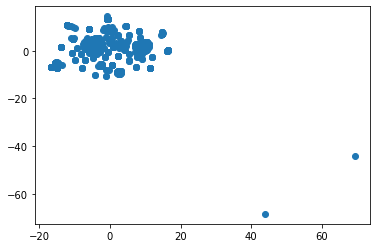

In [22]:
# Plot the t-SNE output
X = tsne_features[:,0]
y = tsne_features[:,1]

plt.scatter(X, y)
plt.show()

In [23]:
# Obtain clusters with the k-means
inertia = []
k = list(range(1,11))

for i in k:
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(principal_components)
    inertia.append(kmeans.inertia_)

c:\Users\Liz\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


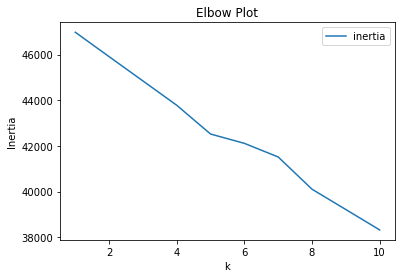

In [24]:
# Elbow plot
elbow_df = pd.DataFrame({'k': k, 'inertia': inertia})
elbow_df.plot.line(x='k', y='inertia')
plt.ylabel('Inertia')
plt.title('Elbow Plot')
plt.show()

In [ ]:
# from the information gathered there does not appear to be any meaningful clusters in the data.